# The Sandpile Cellular Automaton
Author: Michelle Contreras Cossio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Implementation of the Abelian Sandpile model

1. Implement the Abelian Sandpile model and simulate its dynamics. I've included a template of for the solution below, although feel free to re-factor if you would prefer to implement the problem a different way.

In [2]:
class AbelianSandpile:
    """
    An Abelian sandpile model simulation. The sandpile is initialized with a random
    number of grains at each lattice site. Then, a single grain is dropped at a random
    location. The sandpile is then allowed to evolve until it is stable. This process
    is repeated n_step times.

    A single step of the simulation consists of two stages: a random sand grain is 
    dropped onto the lattice at a random location. Then, a set of avalanches occurs
    causing sandgrains to get redistributed to their neighboring locations.
    
    Parameters:
    n (int): The size of the grid
    grid (np.ndarray): The grid of the sandpile
    history (list): A list of the sandpile grids at each timestep
    all_durations (list): A list of the durations of each avalanche
    """

    def __init__(self, n=100, random_state=None):
        self.n = n
        np.random.seed(random_state) # Set the random seed
        self.grid = np.random.choice([0, 1, 2, 3], size=(n, n))
        self.history =[self.grid.copy()] # Why did we need to copy the grid?
        self.all_durations = list() # useful to keep track of the duration of toppling event

    def _step(self):
        """
        Perform a single step of the sandpile model. Step corresponds a single sandgrain 
        addition and the consequent toppling it causes. 

        Returns: None
        """

        # Random sand grain
        x = np.random.randint(0, self.n-1)
        y = np.random.randint(0, self.n-1)
        self.grid[x,y] += 1

        # Avalanche
        self.avalanche()

        # Save a copy of the grid to history
        self.history.append(self.grid.copy())
    
    def _avalanche(self):
        """
        Perform the avalanche until there is no sandpile >= 4
        """
        # Check if any sandpile is >= 4, to start avalanche (repeat until none is)
        while np.any(self.grid >= 4): 
            for ix, iy in np.ndindex(self.grid.shape):
                if self.grid[ix,iy] >= 4:
                    self.grid[ix,iy] -= 4
                    for i in [-1,1]:
                        try: # trying to +1 the nearest neighbors if we are inside the boundary
                            self.grid[ix+i,iy] += 1
                        except:
                            pass
                        try: 
                            self.grid[ix,iy+i] += 1
                        except:
                            pass
      

    # we use this decorator for class methods that don't require any of the attributes 
    # stored in self. Notice how we don't pass self to the method
    @staticmethod
    def check_difference(grid1, grid2):
        """Check the total number of different sites between two grids"""
        return np.sum(grid1 != grid2)

    
    def simulate(self, n_grains):
        """
        Simulate the sandpile model for n_step steps.
        """
        for i in range(n_grains):
            self.step()

        return self.grid


### Test (MICHELLE'S CODE)

2. Using the code included below, show that avalanch durations exhibit a $1/T^\alpha$ distribution, where $\alpha$ is some constant.

Text(0.5, 1.0, 'Avalanch activity in most recent timesteps')

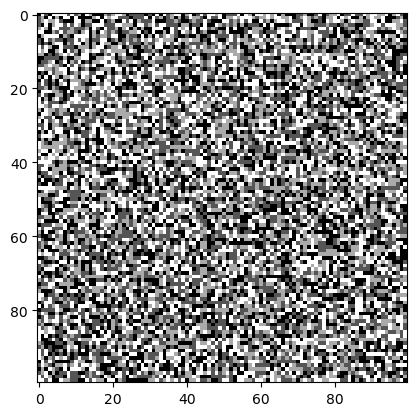

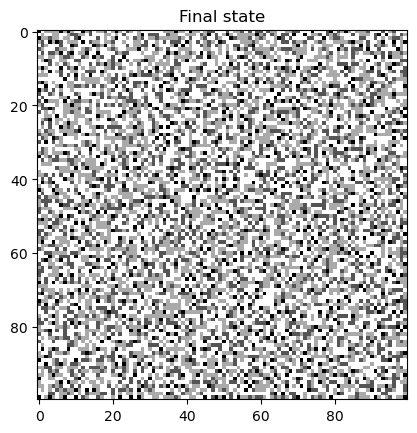

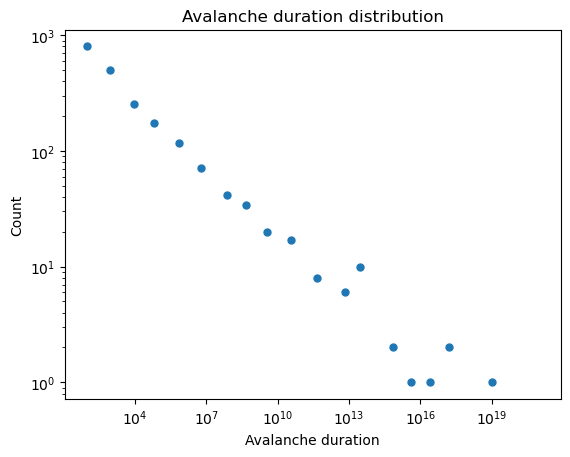

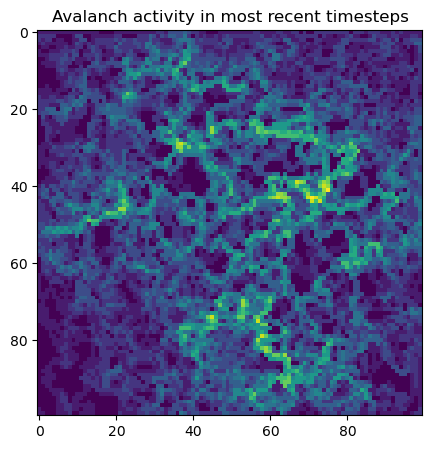

In [3]:
# Run sandpile simulation
model = AbelianSandpile(n=100, random_state=0)

plt.figure()
plt.imshow(model.grid, cmap='gray')

model.simulate(10000)
plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Final state")




# Compute the pairwise difference between all observed snapshots. This command uses list
# comprehension, a zip generator, and argument unpacking in order to perform this task
# concisely.
all_events =  [model.check_difference(*states) for states in zip(model.history[:-1], model.history[1:])]
# remove transients before the self-organized critical state is reached
all_events = all_events[1000:]
# index each timestep by timepoint
all_events = list(enumerate(all_events))
# remove cases where an avalanche did not occur
all_avalanches = [x for x in all_events if x[1] > 1]
all_avalanche_times = [item[0] for item in all_avalanches]
all_avalanche_sizes= [item[1] for item in all_avalanches]
all_avalanche_durations = [event1 - event0 for event0, event1 in zip(all_avalanche_times[:-1], all_avalanche_times[1:])]


log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
plt.figure()
plt.loglog(10**bins[:-1], vals, '.', markersize=10)
plt.title('Avalanche duration distribution')
plt.xlabel('Avalanche duration')
plt.ylabel('Count')

## Visualize activity of the avalanches
# Make an array storing all pairwise differences between the lattice at successive
# timepoints
all_diffs = np.abs(np.diff(np.array(model.history), axis=0))
all_diffs[all_diffs > 0] = 1
all_diffs = all_diffs[np.sum(all_diffs, axis=(1, 2)) > 1] # Filter to only keep big events
most_recent_events = np.sum(all_diffs[-100:], axis=0)
plt.figure(figsize=(5, 5))
plt.imshow(most_recent_events)
plt.title("Avalanch activity in most recent timesteps")

### Test (WILLIAM'S CODE)

Text(0.5, 1.0, 'Avalanch activity in most recent timesteps')

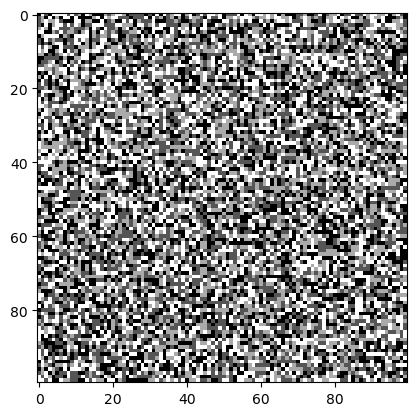

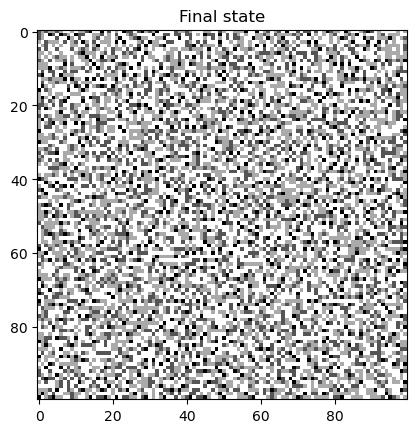

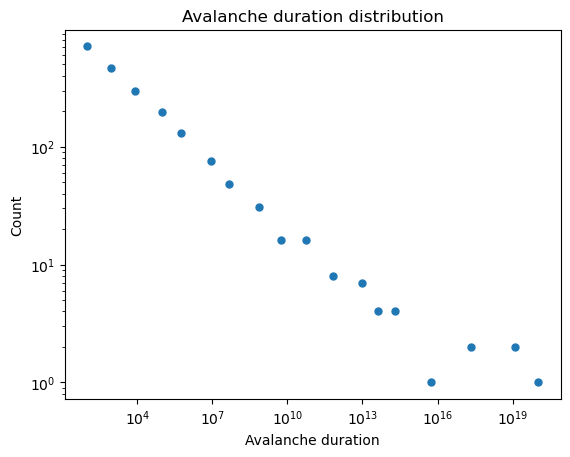

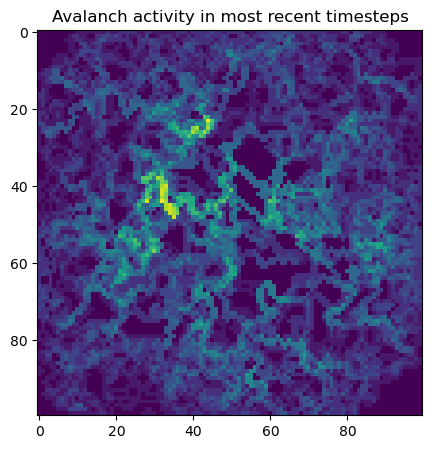

In [6]:
## Import William's solution from answer key
import sys
sys.path.append("../..")
from cphy.hw.solutions.sandpile import AbelianSandpile as ASW

# Run sandpile simulation
model = ASW(n=100, random_state=0)

plt.figure()
plt.imshow(model.grid, cmap='gray')

model.simulate(10000)
plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Final state")




# Compute the pairwise difference between all observed snapshots. This command uses list
# comprehension, a zip generator, and argument unpacking in order to perform this task
# concisely.
all_events =  [model.check_difference(*states) for states in zip(model.history[:-1], model.history[1:])]
# remove transients before the self-organized critical state is reached
all_events = all_events[1000:]
# index each timestep by timepoint
all_events = list(enumerate(all_events))
# remove cases where an avalanche did not occur
all_avalanches = [x for x in all_events if x[1] > 1]
all_avalanche_times = [item[0] for item in all_avalanches]
all_avalanche_sizes= [item[1] for item in all_avalanches]
all_avalanche_durations = [event1 - event0 for event0, event1 in zip(all_avalanche_times[:-1], all_avalanche_times[1:])]


log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
plt.figure()
plt.loglog(10**bins[:-1], vals, '.', markersize=10)
plt.title('Avalanche duration distribution')
plt.xlabel('Avalanche duration')
plt.ylabel('Count')

## Visualize activity of the avalanches
# Make an array storing all pairwise differences between the lattice at successive
# timepoints
all_diffs = np.abs(np.diff(np.array(model.history), axis=0))
all_diffs[all_diffs > 0] = 1
all_diffs = all_diffs[np.sum(all_diffs, axis=(1, 2)) > 1] # Filter to only keep big events
most_recent_events = np.sum(all_diffs[-100:], axis=0)
plt.figure(figsize=(5, 5))
plt.imshow(most_recent_events)
plt.title("Avalanch activity in most recent timesteps")


3. If a single image of the sandpile has size $N$ (the total number of lattice sites), what do you expect to be the worst-case scaling of the runtime of your algorithm? What about the expected scaling of memory usage?

For my naive first attempt to the make the abelian sandpile, I estimate that the run time is around ~ $N_{grain} \times N_{lattice}$ (I want to do another attempt of the method when I don't have E&M homework)

As for the memory usage ~ $N_{lattice}$
